<a href="https://colab.research.google.com/github/anupstar100/Google-Play-Store-App-Review-EDA-/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#Introduction

Google Play Store or formerly Android Market, is a digital distribution service developed and operated by Google. It is an official apps store that provides variety content such as apps, books, magazines, music, movies and television programs. It serves an as platform to allow users with 'Google certified' Android operating system devices to donwload applications developed and published on the platform either with a charge or free of cost. With the rapidly growth of Android devices and apps, it would be interesting to perform data analysis on the data to obtain valuable insights.

#Data Preparation and Cleaning

In [1]:
# IMPORTING NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# ALLOW MATPLOTLIB TO PLOT INLINE WITH FRONTENDS

In [2]:
# MOUNT THE DRIVE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# LOAD THE DATABASE

apps_df = pd.read_csv('/content/drive/MyDrive/Datasets/EDA/PlayStore/Copy of Play Store Data.csv')
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# LOOK AT THE RANDOM 10 RECORDS IN THE APPS DATAFRAME

apps_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
838,Canvas Student,EDUCATION,4.5,42828,Varies with device,"1,000,000+",Free,0,Everyone,Education,"July 20, 2018",Varies with device,Varies with device
784,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
8711,Insta Square Profile DP,PHOTOGRAPHY,3.7,42,11M,"5,000+",Free,0,Everyone,Photography,"September 1, 2015",1.0,4.0 and up
1879,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
6929,Color Changer Pro [root],PERSONALIZATION,4.5,69,951k,"1,000+",Paid,$0.99,Everyone,Personalization,"January 12, 2017",1.11,4.4 and up
5515,QuickShortcutMaker,PERSONALIZATION,4.6,41000,2.0M,"1,000,000+",Free,0,Everyone,Personalization,"February 23, 2014",2.4.0,1.6 and up
9994,EW Gate,BUSINESS,NaN,0,12M,50+,Free,0,Everyone,Business,"April 16, 2018",3.07,4.0 and up
10373,FG VOC,BUSINESS,4.8,6,7.7M,"1,000+",Free,0,Everyone,Business,"August 7, 2018",2.1.5,4.1 and up
8865,DT-VR,FAMILY,3.8,25,9.5M,"1,000+",Free,0,Everyone,Entertainment,"August 9, 2016",1.2,2.2 and up
7992,Archie Comics,COMICS,3.8,5084,6.2M,"100,000+",Free,0,Everyone,Comics,"June 19, 2018",2.2.0,4.3 and up


# Unique Columns Data

In [5]:
# UNIQUE CATEGORies

apps_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [6]:
# UNIQUE 'TYPE'

apps_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [7]:
# UNIQUE RATINGS

apps_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [8]:
# UNIQUE GENRES

apps_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [9]:
# INFO OF DATAFRAME

apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


By diagnosing the DataFrame, we know that:

1.   There are 13 columns of properties with 10841 rows of data.
2.   Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'.
3.   Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.
4.   Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.
5.   Values of column 'Price' are strings representing price with symbol '$'.
6.   There is only one float64 type column which is 'Rating'.

Hence, we will need to do some data cleaning.



#Data Cleaning

In [10]:
# 1. CLEAN THE REVIEWS DATA AND CHANGE THE TYPE FROM 'OBJECT' TO 'FLOAT'

reviews = [i for i in apps_df['Reviews']]

def clean_reviews(review_list):

  """
  An 'M has been found while changing the type,
  this function will replace the 'M' with million
  """

  cleaned_data = []
  for review in review_list:

    if 'M' in review:
      review = review.replace('M', '')
      review = float(review) * 1000000    # 1 M = 10,00,000
    cleaned_data.append(review)
    
  return cleaned_data

In [11]:
apps_df['Reviews'] = clean_reviews(reviews)
apps_df['Reviews'] = apps_df['Reviews'].astype(float)

In [12]:
# 2. CLEAN SIZE DATA COLUMN AND CHANGE ITS TYPE FROM 'OBJECT' TO 'FLOAT'

sizes = [i for i in apps_df['Size']]

def clean_size(size_list):

  """
  As sizes are repesented in 'M' or 'K', we
      remove 'M' and convert 'K' into 'M'
  """

  cleaned_data = []
  for size in size_list:

    if 'M' in size:
      size = size.replace('M', '')
      size = float(size)

    elif 'k' in size:
      size = size.replace('k', '')
      size = float(size)
      size = size / 1024    # 1 MB = 1024 KB

    else:
      size = float(0)       # REPRESENTING 'VARIES WITH DEVICE' WITH VALUE 0
    cleaned_data.append(size)
    
  return cleaned_data

In [13]:
apps_df['Size'] = clean_size(sizes)
apps_df['Size'] = apps_df['Size'].astype(float)

In [14]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [15]:
# 3. CLEAN THE INSTALLS DATA AND CHANGE THE TYPE FROM 'OBJECT' TO 'FLOAT'

installs = [i for i in apps_df['Installs']]

def clean_install(install_list):
  """
  This function removes the + and , from the data.
  There is one row where installs is 'Free'. Since there is only one,
  so, we make it 0.
  """
  
  clean_data = []
  for install in install_list:

    if '+' in install:
      install = install.replace('+', '')  # REMOVE +

    if ',' in install:
      install = install.replace(',', '')  # REMOVE ,
    
    if install == 'Free':
      install = install.replace('Free', '0')  # SINCE THERE IS ONLY ONE COLUMN WITH FREE, REPLACE IT WITH 0
    
    install = int(install)
    clean_data.append(install)

  return clean_data

In [16]:
apps_df['Installs'] = clean_install(installs)
apps_df['Installs'] = apps_df['Installs'].astype(float)

In [17]:
# 4. CLEAN THE PRICE DATA AND CHANGE THE TYPE FROM 'OBJECT' TO 'FLOAT'

prices = [i for i in apps_df['Price']]

def clean_prices(price_list):
  """
  This function removes the '$' sign from the data.
  There is one row of price column with data as everyone.
  Making it free or 0.
  """
  clean_data = []
  for price in price_list:

    if '$' in price:
      price = price.replace('$', '')
    
    if price == 'Everyone':
      price = price.replace('Everyone', '0')

    clean_data.append(price)
  
  return clean_data

In [18]:
apps_df['Price'] = clean_prices(prices)
apps_df['Price'] = apps_df['Price'].astype(float)

In [19]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [20]:
# CHECKING FOR NULL VALUES

apps_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

So, there are 1474 null values under 'Rating' column. So, we are going to replace with median of overall rating values.

In [21]:
def replace_with_median(series):
  """
  Takes a series and replace the null values with median
  """
  return series.fillna(series.fillna(series.median()))

In [22]:
apps_df['Rating'] = apps_df['Rating'].transform(replace_with_median)
apps_df['Rating'] = apps_df['Rating'].astype(float)

In [23]:
# REMOVE THE RECORD WHERE 'TYPE' IS HAVING NULL VALUE

index = apps_df[apps_df['Type'].isna()].index
apps_df.drop(axis = 0, inplace = True, index = index)

In [24]:
# CHECKING FOR NULL VALUES AGAIN

apps_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [25]:
# FILLING THE NULL VALUES OF CURRENT VERSION WITH 1.0

apps_df['Current Ver'] = apps_df['Current Ver'].fillna(1.0)

In [26]:
# FILLING THE NULL VALUES OF ANDROID VERSION WITH PREVIOUS DATA

apps_df['Android Ver'] = apps_df['Android Ver'].fillna(method = 'pad')

In [27]:
# CHECKING FOR NULL VALUES AGAIN

apps_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [28]:
# DROPPING THE DUPLICATE ROWS BASED ON APPS

apps_df.drop_duplicates(subset = ['App'], inplace=True)

In [29]:
# CHECK ON STATISTICAL INFORMATION OF THE DATAFRAME

apps_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9659.000000,9.659000e+03,9659.000000,9.659000e+03,9659.000000
mean,4.193964,2.169032e+05,17.804097,7.777507e+06,1.099299
std,0.518758,1.831537e+06,21.495518,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,2.900000,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,9.100000,1.000000e+05,0.000000
75%,4.500000,2.942550e+04,25.000000,1.000000e+06,0.000000
max,19.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


*  Half of the apps are less than 10 MB.
*  Maximum size of the available app in this data is 100 MB.

In [30]:
# CHECKING FOR THE USER REVIEW DATAFRAME

user_df = pd.read_csv('/content/drive/MyDrive/Datasets/EDA/PlayStore/Copy of User Reviews.csv')
user_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [31]:
# CHECKING FOR DATA TYPES

user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [32]:
# CHECKING FOR THE NULL VALUES

user_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [33]:
# REPLACING THE NULL VALUES OF TRANSLATED REVIEW WITH ITS PREVIOUS ONE

user_df['Translated_Review'] = user_df['Translated_Review'].fillna(method = 'pad')

In [34]:
# REPLACING THE NULL VALUES OF SENTIMENT WITH ITS PREVIOUS ONE

user_df['Sentiment'] = user_df['Sentiment'].fillna(method = 'pad')

In [35]:
# REPLACING THE NULL VALUES OF SENTIMENT POLARITY AND SENTIMENT SUBJECTIVITY WITH ITS MEDIAN

user_df['Sentiment_Polarity'] = user_df['Sentiment_Polarity'].transform(replace_with_median)
user_df['Sentiment_Subjectivity'] = user_df['Sentiment_Subjectivity'].transform(replace_with_median)

In [36]:
# CHECKING FOR THE NULL VALUES AGAIN

user_df.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

#Exaploratory Analysis and Visualization

##Category

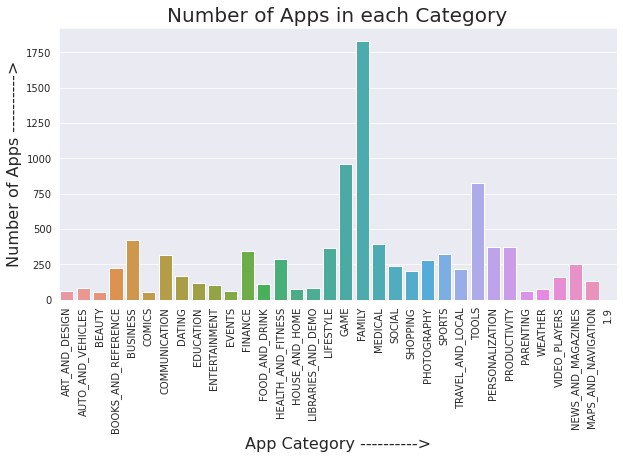

In [37]:
# NUMBER OF APPS IN EACH CATEGORY

sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Category', data = apps_df)

plt.title('Number of Apps in each Category', size = 20)
plt.xticks(rotation = 90)
plt.xlabel('App Category ---------->', size = 16)
plt.ylabel('Number of Apps ---------->', size = 16)

plt.show()

Important Findings:
*  Most of the apps in Play Store belongs to the category of 'Family'.
*  And then 'Game' and 'Tools'.

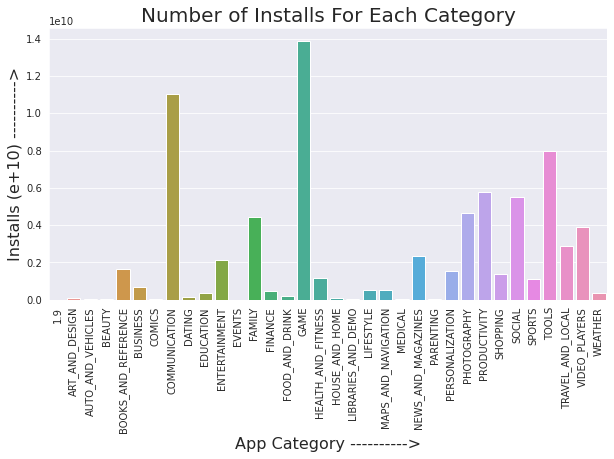

In [38]:
# NUMBER OF INSTALLS FOR EACH CATEGORY

categories = apps_df.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum().reset_index()   # TO CONVERT GROUP BY OBJECTS INTO DATAFRAME

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Category', y = 'Installs', data=category_installs_sum_df)

plt.xticks(rotation = 90)
plt.xlabel('App Category ---------->', size = 16)
plt.ylabel('Installs (e+10) ---------->', size = 16)
plt.title('Number of Installs For Each Category', size = 20)

plt.show()

Important Findings:
*  Most of the downloaded and installed apps are from the category of 'Games'.
*  And then 'Communication' and 'Tools'.

##Rating

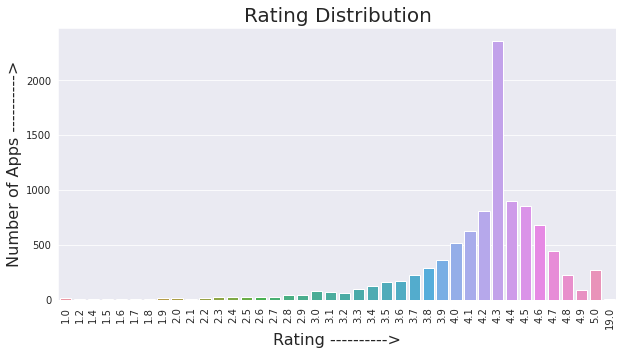

In [44]:
# DISTRIBUTION OF RATING

plt.figure(figsize = (10, 5))
sns.countplot(x = 'Rating', data = apps_df)

plt.title('Rating Distribution', size = 20)
plt.xticks(rotation = 90)
plt.xlabel('Rating ---------->', size = 16)
plt.ylabel('Number of Apps ---------->', size = 16)

plt.show()

Important Findings:
*  The highest rating is 4.3.
*  There very few apps (less than 500) are having 5.0 rating.
*  Most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

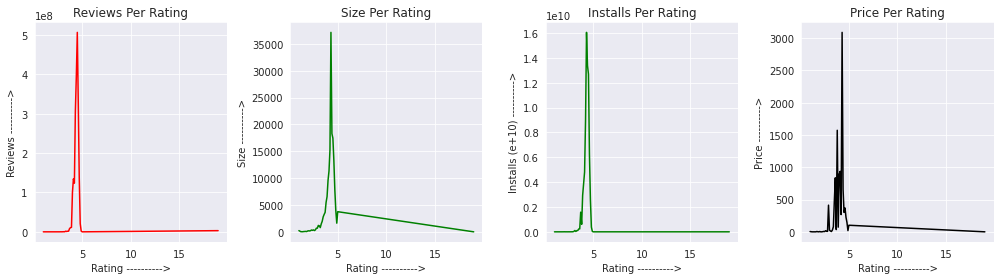

In [56]:
# GRAPHS OF REVIEWS, SIZE, INSTALLS AND PRICE PER RATING

rating_df = apps_df.groupby('Rating').sum().reset_index()   # MAKING A DATAFRAME TO PLOT

fig, axes = plt.subplots(1, 4, figsize = (14, 4))

axes[0].plot(rating_df['Rating'], rating_df['Reviews'], 'r')
axes[0].set_xlabel('Rating ---------->')
axes[0].set_ylabel('Reviews ---------->')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating_df['Rating'], rating_df['Size'], 'g')
axes[1].set_xlabel('Rating ---------->')
axes[1].set_ylabel('Size ---------->')
axes[1].set_title('Size Per Rating')

axes[2].plot(rating_df['Rating'], rating_df['Installs'], 'g')
axes[2].set_xlabel('Rating ---------->')
axes[2].set_ylabel('Installs (e+10) ---------->')
axes[2].set_title('Installs Per Rating')

axes[3].plot(rating_df['Rating'], rating_df['Price'], 'k')
axes[3].set_xlabel('Rating ---------->')
axes[3].set_ylabel('Price ---------->')
axes[3].set_title('Price Per Rating')

plt.tight_layout()
plt.show()

Important Findings:
*  Most of the apps with higher rating range of 4.0 - 4.7 are having high amount of reviews, size, and installs.
*  So, users generally prefer apps having higher rating.
*  

Text(0.5, 1.0, 'Reviews Per Rating')

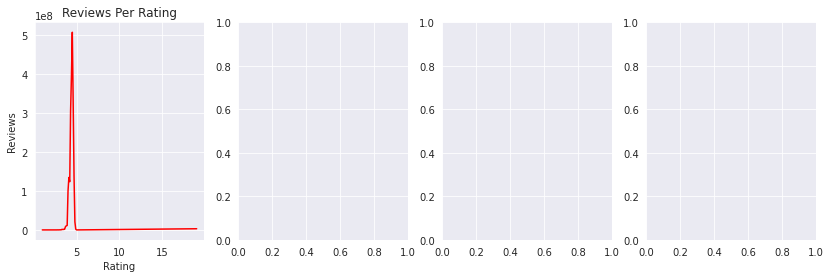